# L4: Running code in the cloud ⛅

![alt](media/agent.png)


<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> , notebooks and other files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>

</div>

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Different Run Results:</b> The output generated by AI chat models can vary with each execution due to their dynamic, probabilistic nature. Don't be surprised if your results differ from those shown in the video.</p>

First start by filtering warnings and loading environment variables.

In [1]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

# Load environment variables
from helper import load_env
load_env()

You can create a sandbox with E2B by using `Sandbox.create` and giving it a timeout. Then you can run code by simply using the `run_code` method. Try it out below.

In [2]:
from e2b_code_interpreter import Sandbox

sbx = Sandbox.create(timeout=60 * 60)
sbx.run_code("print('hello world')")

Execution(Results: [], Logs: Logs(stdout: ['hello world\n'], stderr: []), Error: None)

In [3]:
sbx.run_code("a=5\na")

Execution(Results: [Result(5)], Logs: Logs(stdout: [], stderr: []), Error: None)

In [4]:
sbx.run_code("console.log('Hello, world!')", language="javascript")

Execution(Results: [], Logs: Logs(stdout: ['Hello, world!\n'], stderr: []), Error: None)

### Creating plots

You can create plots by running code with `matplotlib`. You can display the results from the sandbox after running the code.

In [5]:
code = """import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(100)
y = np.random.randn(100)

plt.scatter(x, y, alpha=0.7)
plt.title('Random Scatter')
plt.show()"""

execution = sbx.run_code(code)

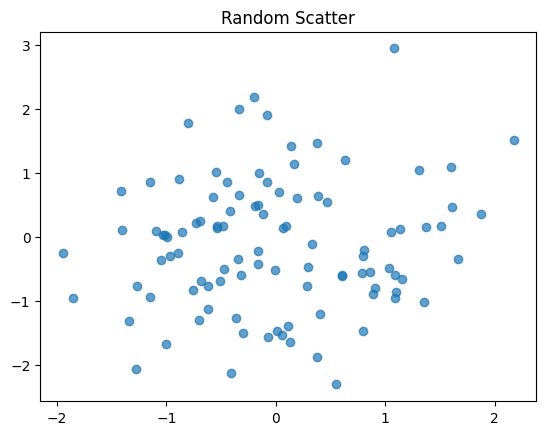

In [6]:
from IPython.display import Image, display
import base64

display(Image(data=base64.b64decode(execution.results[0].png)))

### Listing Sandboxes

You can list sandboxes and get important information about the sandboxes. Note that the sandbox IDs are unique to the user who created them and will differ from those in the video.

In [7]:
running_sandboxes = Sandbox.list().next_items()
f"""Running sandboxes with ids = {[
    sbx.sandbox_id for sbx in running_sandboxes
]}"""

"Running sandboxes with ids = ['in7f3alt49go3fu53zt66', 'ito17x7g6tudwkfth53o8', 'ich9o1zw3wsy5iqrbn7tu', 'ieht8slhuca464nypmi8k', 'ilp2sjoxcuccqzr2umw84', 'iaimzb5paj6sbu6yt0isw', 'iw5700vesmukkkgoe7467', 'izxiex74p1e0sclv9n23p', 'i8mo05szmcq1ri6lgageb', 'iwxoxy1ctbkd2cv7q4gty', 'ihdim9hbjv6ldcsuqq0g7', 'i7413ypn7xe5i2wehpicb', 'iilwdmqvh9toj6g6nsdn7', 'is7qh3xli179ap9eo3yle', 'imxq0fxeos766rqwkhkrh', 'icd1t8etl5ycegtkbdrqg', 'iynbjen1a9cppdagd1fhe', 'ir541aa2qpp8vlrbhsg5l', 'inj0v6ux13netrks5280d', 'izdty2zt6z1wjh6qhz1lx', 'ihwgo9h9n97sskyqxlw6n', 'i44t8f8xona2lwg93zkln', 'iey5qpigbrl8bev5usoai', 'iy4xwvlq2uz1etmnvllb8']"

In [8]:
running_sandbox = running_sandboxes[0]

print("Running sandbox metadata:", running_sandbox.metadata)
print("Running sandbox id:", running_sandbox.sandbox_id)
print("Running sandbox started at:", running_sandbox.started_at)
print("Running sandbox template id:", running_sandbox.template_id)

Running sandbox metadata: {}
Running sandbox id: in7f3alt49go3fu53zt66
Running sandbox started at: 2025-12-03 19:28:24.198430+00:00
Running sandbox template id: nlhz8vlwyupq845jsdg9


### Querying Sandboxes
By attaching metadata, you can query the sandbox and find them.

In [9]:
from e2b_code_interpreter import Sandbox, SandboxQuery, SandboxState

sbx = Sandbox.create(
    metadata={
        "name": "find me!",
    }
)


running_sandboxes = Sandbox.list(SandboxQuery(
        metadata={
            "name": "find me!",
        },
        state=[SandboxState.RUNNING])
)

f"""Found sandboxes with ids = {[
    sbx.sandbox_id for sbx in running_sandboxes.next_items()
]}"""

"Found sandboxes with ids = ['irujetsg8o5pdqen81snb', 'ilp2sjoxcuccqzr2umw84']"

### Working with files
E2B sandboxes have a file system and you can create directories, write to file, read files, and remove files.

In [10]:
sbx = Sandbox.create()
sbx.files.make_dir("/home/user/data")

True

In [11]:
sbx.files.write("/home/user/data/hello.txt", "Hello from the sandbox")

WriteInfo(name='hello.txt', type='file', path='/home/user/data/hello.txt')

In [12]:
content = sbx.files.read("/home/user/data/hello.txt")
content

'Hello from the sandbox'

In [13]:
sbx.files.remove("/home/user/data/hello.txt")

### Caching sandboxes

Using `create_sandbox` allows you to create a sandbox if it does not exist. If you call it again, it will reconnect to it.

In [14]:
from lib.utils import create_sandbox

sbx = create_sandbox()

INFO     [sandbox] 🚀 Creating new Sandbox.create(id=idfe69v5quzcb33s2bz0a)

In [15]:
sbx = create_sandbox()

INFO     [sandbox] 🔌 Reconnecting to Sandbox.create(id=idfe69v5quzcb33s2bz0a)

### Websites

You can also run websites from the sandbox by creating an `index.html` file and serving the file.

In [ ]:
from lib.utils import create_sandbox

sbx = create_sandbox()

simple_website = """<!DOCTYPE html>
<html>
<head><title>Test Site</title></head>
<body><h1>Hello World from the Sandbox :)</h1></body>
</html>"""

sbx.files.write("index.html", simple_website)

In [ ]:
command = sbx.commands.run("python -m http.server 3000 --bind 0.0.0.0", background=True)
host = sbx.get_host(3000)

In [ ]:
from IPython.display import IFrame

IFrame(f"https://{host}/index.html", width=800, height=300)

## Running code on the cloud

You can modify your previous `execute_code` function to use the `run_code` method from your sandbox. This will allow it to execute code in the sandbox environment instead of locally as before.

In [ ]:
from e2b_code_interpreter import Execution, Sandbox
from typing import Tuple


def execute_code(code: str, sbx: Sandbox) -> Tuple[Execution, dict]:
    metadata = {}
    execution = sbx.run_code(code)
    return execution.to_json(), {}

tools = {"execute_code": execute_code}

In [ ]:
from lib.tools_schemas import execute_code_schema
from lib.coding_agent import coding_agent, log
from openai import OpenAI

client = OpenAI()

sbx = create_sandbox()

system = """
You are a senior python programmer. 
You must run the code using the `execute_code` tool."""

_ = log(coding_agent,
    client,
    sbx,
    "Make and run a function to roll a 6 faces dice",
    system=system,
    tools=tools,
    tools_schemas=[execute_code_schema],
)

In [ ]:
query = """Create file.txt with 'hello world' inside, 
then read and print back its content.
"""
_ = log(coding_agent,
    client,
    sbx,
    query,
    system=system,
    tools=tools,
    tools_schemas=[execute_code_schema],
)

You can even do more complex tasks like creating a minimalist snake game using just HTML and JavaScript and then serving that from the sandbox. Note that this can take around 3-4 minutes to complete.

In [ ]:
query = """Create a minimalist Snake game and save it into index.html.
It must have the following features:
- 10x10 grid (CSS Grid or Canvas)
- Arrow keys for movement
- Food spawns randomly
- Snake grows when eating
- Game over on wall/self collision
- Simple score counter
- Restart button
- Retro green-on-black styling
- Pure vanilla JS, no libs
- Snake speed is 4 block per second
- Use random food emoji for food
"""

sbx = create_sandbox()
_ = log(coding_agent,
    client,
    sbx,
    query,
    system=system,
    tools=tools,
    tools_schemas=[execute_code_schema],
    model="gpt-5-mini",
)

Now you can start a server on the sandbox and access the game online.

In [ ]:
command = sbx.commands.run("python -m http.server 3000 --bind 0.0.0.0", background=True)

host = sbx.get_host(3000)
IFrame(f"https://{host}/index.html", width=800, height=800)

Alternatively, you could run this locally on your own computer by running the cell below, downloading `index.html` file, and then running it in your own browser.

In [ ]:
content = sbx.files.read("/home/user/index.html")

with open("index.html", "w") as f:
    f.write(content)